In [7]:
import gen_test
import PBS_last_order
import PBS_order
import map
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt
import visualisation

In [8]:
data = []

height = 15
width = 30
map_str1 = '''
. . . # # . . . . . . . . # # . . . # . . # # . . . . . . .  
. . . # # # # # . . # . . # # . . . . . . # # . . . . . . . 
. . . . . . . # . . # . . # # . . . # . . # # . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # # . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # # . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # # # # # . . . . 
. . . # # . . # . . # . . # # . . . # . . # # # # # . . . . 
. . . . . . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . # # . . . . . # . . . . . . . # . . . . . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . # # # # # # # # # # # # # . # # . # # # # # # # . # # 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
'''

data.append((map_str1, width, height))

map_str2 = '''
. . . . . . . . . . . . . . . . . . # . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . # . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . # . . . . . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # . # # # . . . . 
. . . # # . . . . . . . . . . . . . . . . # . # # # . . . . 
. . . . . . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . . . . . # . . . . . # # . . . . . . # . . . . . . . . 
. . . . . . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . # # . . . . . . # # . . # . # # . # . # # # # # . # # 
. . . # # . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
'''

data.append((map_str2, width, height))

map_str3 = '''
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
'''

data.append((map_str3, width, height))

test_maps = [map.Map().read_from_string(*dt) for dt in data]


height_str_new = 9
width_str_new = 30
map_str_new = '''
. . . . . . . # . . # . . . . . . . # . . # . . . . . . . . 
. . . . . . . # . . # . . . . . . . # . . # . . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . # # . . . . . # . . . . . . . # . . . . . . . . . . . 
. . . # # . . # . . # . . # # . . . # . . # . . . . . . . . 
. . . # # # # # # # # # # # # # . # # . # # # # # # # . # # 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . .
'''


100%|██████████| 10/10 [00:50<00:00,  5.03s/it]


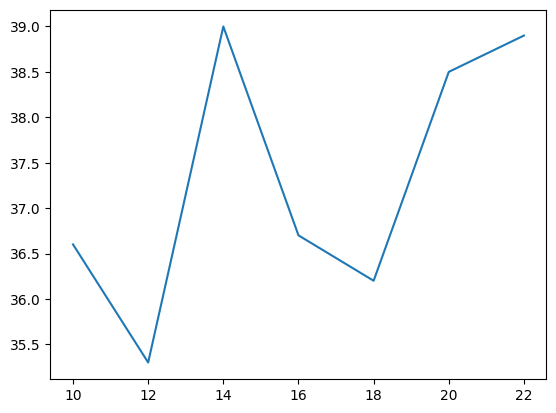

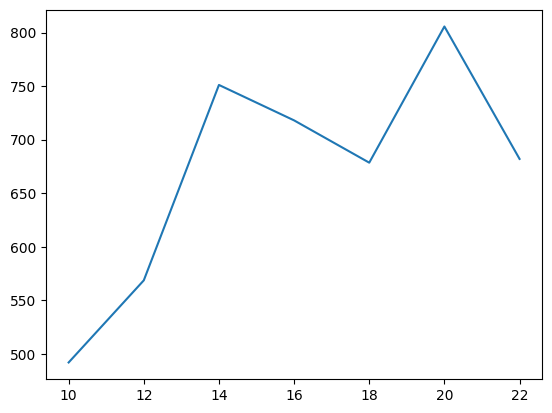

100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


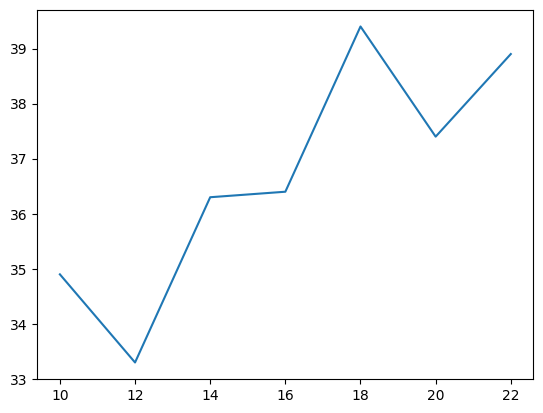

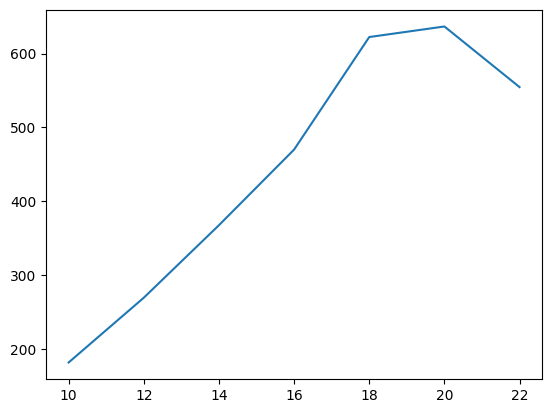

100%|██████████| 10/10 [00:00<00:00, 22.96it/s]


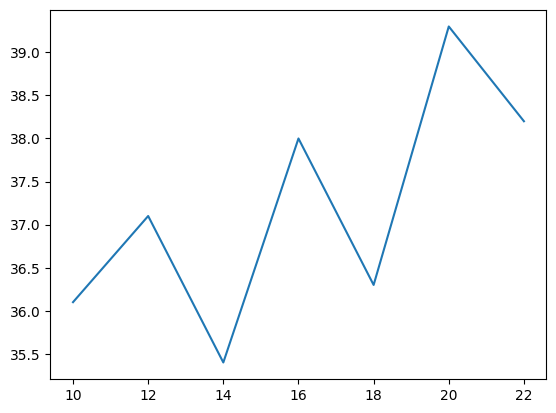

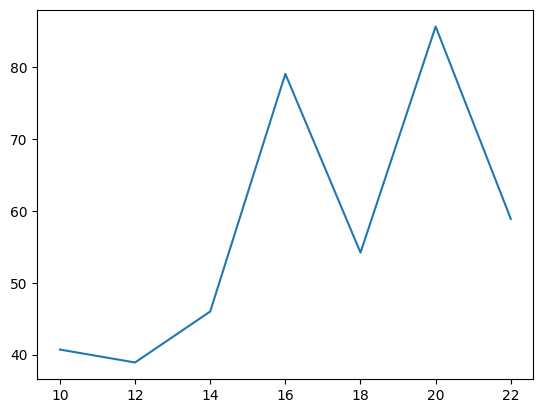

In [11]:
random.seed(101)
step = 2
iter_ = 0
for map_ in test_maps:
    alg1 = []
    alg2 = []
    for N in range(10, 24, step):
        tests = []
        for i in range(10):
            tests.append(gen_test.gen_tasks(map_, N))
        times = [[],[]]
        for starts, goals in tqdm(tests):
            dyn_obst_traj1, time1 = PBS_order.PBS(starts, goals, PBS_order.astar_timesteps, map_, PBS_order.manhattan_distance, PBS_order.SearchTree)
            order = random.shuffle(list(range(N)))
            dyn_obst_traj2, time2 = PBS_last_order.FixedOrderSearch(starts, goals, map_, order=order)
            times[0].append(time1)
            times[1].append(time2)
        alg1.append(np.array(times[0]).mean())
        alg2.append(np.array(times[1]).mean())
    plt.plot(range(10, 24, step), alg1)
    plt.savefig(f'foo{iter_}.png', bbox_inches='tight')
    plt.show()
    iter_ += 1
    plt.plot(range(10, 24, step), alg2)
    plt.savefig(f'foo{iter_}.png', bbox_inches='tight')
    plt.show()
    iter_ += 1


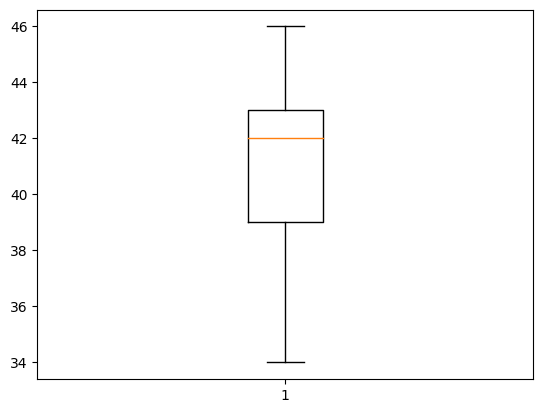

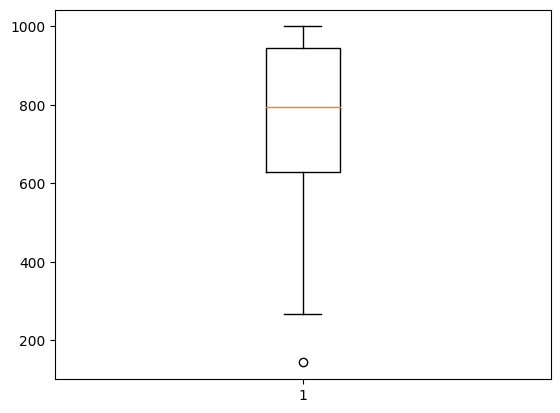

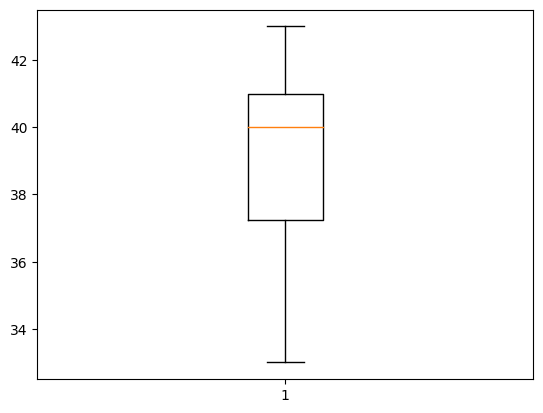

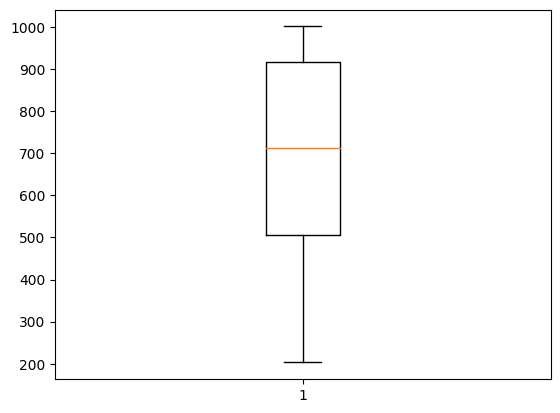

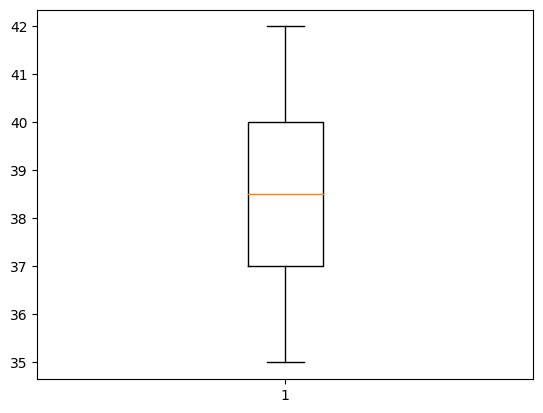

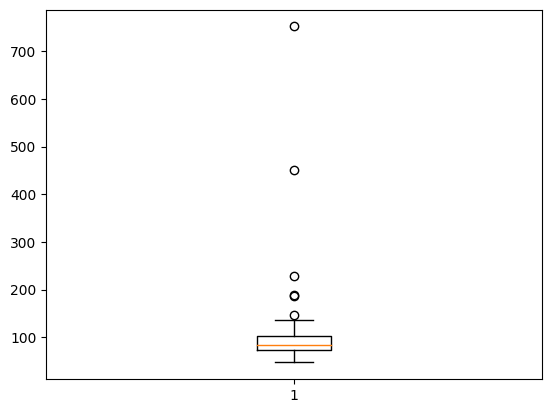

In [12]:
N = 30
iter_ = 0
for map_ in test_maps:
    alg1 = []
    alg2 = []
    tests = []
    for i in range(50):
        tests.append(gen_test.gen_tasks(map_, N))
    times = [[],[]]
    for starts, goals in tests:
        dyn_obst_traj1, time1 = PBS_order.PBS(starts, goals, PBS_order.astar_timesteps, map_, PBS_order.manhattan_distance, PBS_order.SearchTree)
        order = random.shuffle(list(range(N)))
        dyn_obst_traj2, time2 = PBS_last_order.FixedOrderSearch(starts, goals, map_, order=order)
        times[0].append(time1)
        times[1].append(time2)
    plt.boxplot(times[0])
    plt.savefig(f'box1_{iter_}.png', bbox_inches='tight')
    plt.show()
    plt.boxplot(times[1])
    plt.savefig(f'box2_{iter_}.png', bbox_inches='tight')
    plt.show()
    iter_ += 1

In [13]:
n = 70
num_of_map = 0
starts, goals = gen_test.gen_tasks(test_maps[num_of_map], n, mode="sides")
order = random.shuffle(list(range(n)))
dyn_obst_traj, _ = dyn_obst_traj1, time1 = PBS_order.PBS(starts, goals, PBS_order.astar_timesteps, test_maps[num_of_map], PBS_order.manhattan_distance, PBS_order.SearchTree)
visualisation.draw(test_maps[num_of_map], dyn_obst_traj, 60)

100%|██████████| 60/60 [00:00<00:00, 72.30it/s]


In [14]:
map_ = map.Map()
map_.read_from_string(map_str_new, width_str_new, height_str_new)

n = 61
starts, goals = gen_test.gen_tasks(map_, n, mode="sides")
order = random.shuffle(list(range(n)))
dyn_obst_traj, _ = dyn_obst_traj1, time1 = PBS_order.PBS(starts, goals, PBS_order.astar_timesteps, map_, PBS_order.manhattan_distance, PBS_order.SearchTree)
visualisation.draw(map_, dyn_obst_traj, 60)

100%|██████████| 60/60 [00:00<00:00, 76.39it/s]
